In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from sklearn.preprocessing import StandardScaler
import math

In [2]:
data = np.array(pd.read_csv('~/DataSet3/1.csv'))

In [3]:
data1=data[:,1:4]
labels = data[:,-1]
labels

array([1., 1., 1., ..., 7., 7., 0.])

**Scalling data to normalize the effect of each dimention and also reduce effect of outliers**

In [4]:
scaler = StandardScaler()
scaler.fit(data1)
sample_transformed = scaler.transform(data1)
print(scaler.mean_)

[1910.67337231 2380.28738462 2041.21414154]


**Elbow Implimentation with Root Mean Squared Standered Deviation**

In [6]:
RMSSTD={}
K = range(1,10)
for k in K :
    RMSSTD[k]=0
    kmeansModel = KMeans(n_clusters=k)
    labels= kmeansModel.fit_predict(sample_transformed)
    centers = kmeansModel.cluster_centers_
    sample_transformed1 = kmeansModel.fit_transform(sample_transformed)
    for i in range(0,k):
        cluster_datapoints = pd.DataFrame(sample_transformed[labels==i],columns=["PC1","PC2","PC3"])
        print(cluster_datapoints.head())
        
        #Mean Value of each dimention of datapoints in this cluster
        cluster_mean = cluster_datapoints.mean(axis=0)
        print("Cluster Mean= "+str(cluster_mean))
        
        for index,row in cluster_datapoints.iterrows():
            a=(row["PC1"]-cluster_mean["PC1"])**2
            b=(row["PC2"]-cluster_mean["PC2"])**2
            c=(row["PC3"]-cluster_mean["PC3"])**2
            err=math.sqrt(a+b+c)
            RMSSTD[k]=RMSSTD[k]+err
    #Calculate the mean error for entire dataset
    RMSSTD[k]=RMSSTD[k]/len(sample_transformed)
    print("RMSSTD = "+str(RMSSTD))

        PC1        PC2       PC3
0 -5.995817  -7.353531  0.097194
1 -7.373750 -10.096608 -2.271409
2 -7.619810 -10.525959 -3.531304
3 -6.586359  -9.905785 -2.724971
4 -7.545992 -10.048902 -2.019430
Cluster Mean= PC1    7.577300e-14
PC2   -6.528475e-15
PC3    1.621418e-14
dtype: float64
RMSSTD = {1: 1.4785656756047563}
        PC1        PC2       PC3
0 -5.995817  -7.353531  0.097194
1 -7.373750 -10.096608 -2.271409
2 -7.619810 -10.525959 -3.531304
3 -6.586359  -9.905785 -2.724971
4 -7.545992 -10.048902 -2.019430
Cluster Mean= PC1   -0.488670
PC2    0.084368
PC3   -0.520015
dtype: float64
        PC1       PC2        PC3
0 -4.593277 -6.661798   4.498428
1  0.450944  0.684878  11.721827
2  4.806199 -1.390320  -3.615297
3  5.224500 -1.366467  -3.800082
4  4.781593 -2.058199  -3.632095
Cluster Mean= PC1    1.175109
PC2   -0.202880
PC3    1.250486
dtype: float64
RMSSTD = {1: 1.4785656756047563, 2: 0.9427612135222144}
        PC1        PC2       PC3
0 -5.995817  -7.353531  0.097194
1 -7.373

        PC1       PC2        PC3
0  0.450944  0.684878  11.721827
1  5.421348 -2.702226  -3.077742
2  5.913467 -1.223350  -2.405797
3  6.331768 -0.984822  -0.457160
4  6.036496 -0.126119   0.197986
Cluster Mean= PC1    1.418702
PC2   -0.172983
PC3    1.342189
dtype: float64
        PC1       PC2       PC3
0 -7.988899 -2.415992 -2.674575
1 -8.185747 -1.700407 -4.925588
2 -1.689774 -0.960969 -1.061909
3 -0.557900 -0.650882 -0.373167
4 -0.607112  0.255526 -0.037194
Cluster Mean= PC1   -0.736147
PC2   -0.011024
PC3   -0.704443
dtype: float64
        PC1        PC2       PC3
0 -5.995817  -7.353531  0.097194
1 -7.373750 -10.096608 -2.271409
2 -7.619810 -10.525959 -3.531304
3 -6.586359  -9.905785 -2.724971
4 -7.545992 -10.048902 -2.019430
Cluster Mean= PC1   -0.384511
PC2   -2.185538
PC3   -0.156860
dtype: float64
        PC1       PC2       PC3
0 -9.834346 -2.916902 -0.977916
1 -8.234959 -3.894868  0.298778
2 -6.069634 -3.322400  0.382771
3 -4.322611 -0.889410 -0.658743
4 -6.635571 -3.012313

In [7]:
SSE_array=[]
slope=[]
for key,value in RMSSTD.items():
    SSE_array.append(value)
print(SSE_array)

#Calculate slope of each line
for p in range(1,9):
    s= (SSE_array[p]-SSE_array[p-1])
    slope.append([p+1,s])
slope

[1.4785656756047563, 0.9427612135222144, 0.8521837546731685, 0.7385428515291896, 0.6440333165566682, 0.5813074104033077, 0.5648228970911788, 0.5410245797576079, 0.5363908013673706]


[[2, -0.5358044620825418],
 [3, -0.09057745884904589],
 [4, -0.1136409031439789],
 [5, -0.09450953497252146],
 [6, -0.06272590615336049],
 [7, -0.016484513312128857],
 [8, -0.023798317333570962],
 [9, -0.004633778390237264]]

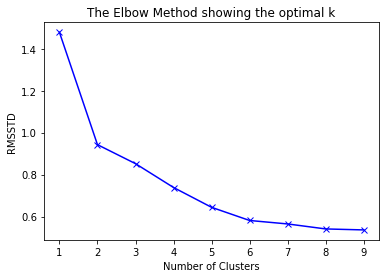

In [8]:
plt.plot(K,SSE_array,'bx-')
plt.xlabel('Number of Clusters')
plt.ylabel('RMSSTD')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [9]:
#chose the value after which there is a reduction in gain(rather loss)
for a in range(0,7):
    change_slope=(slope[a])[-1] - (slope[a+1])[-1]
    if change_slope > 0:
        print('Optimal Number of Clusters = '+str((slope[a][0])-1))

Optimal Number of Clusters = 2
Optimal Number of Clusters = 6
